In [1]:
pip install tld

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install googlesearch-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install itertools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from lightgbm import LGBMClassifier
from wordcloud import WordCloud

In [4]:
df=pd.read_csv('malicious_phish.csv')
print(df.shape)
df.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [5]:
df_phish=df[df.type=='phishing']
df_malware=df[df.type=='malware']
df_deface=df[df.type=='defacement']
df_benign=df[df.type=='benign']

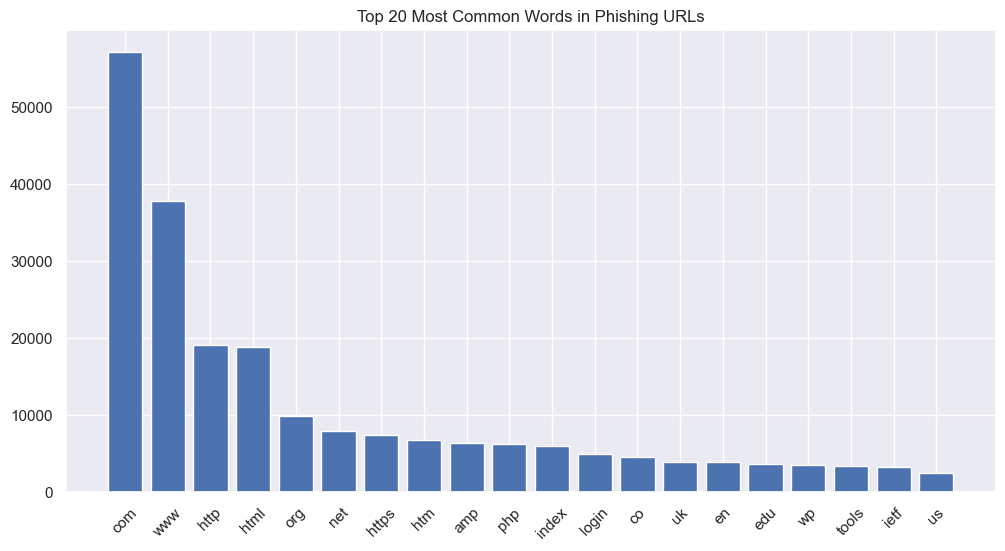

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import re

# Split URLs into words (simple split on non-alphanumerics)
words = []
for url in df_phish.url:
    words.extend(re.findall(r"[a-zA-Z0-9]+", url.lower()))

counter = Counter(words).most_common(20)

labels, counts = zip(*counter)

plt.figure(figsize=(12,6))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Phishing URLs")
plt.show()


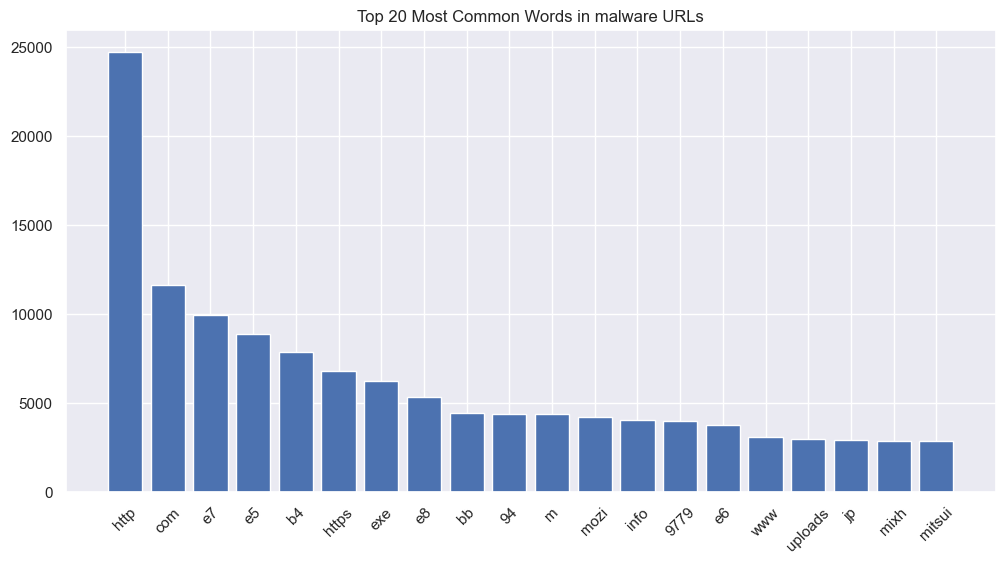

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Split URLs into words (simple split on non-alphanumerics)
words = []
for url in df_malware.url:
    words.extend(re.findall(r"[a-zA-Z0-9]+", url.lower()))

counter = Counter(words).most_common(20)

labels, counts = zip(*counter)

plt.figure(figsize=(12,6))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in malware URLs")
plt.show()


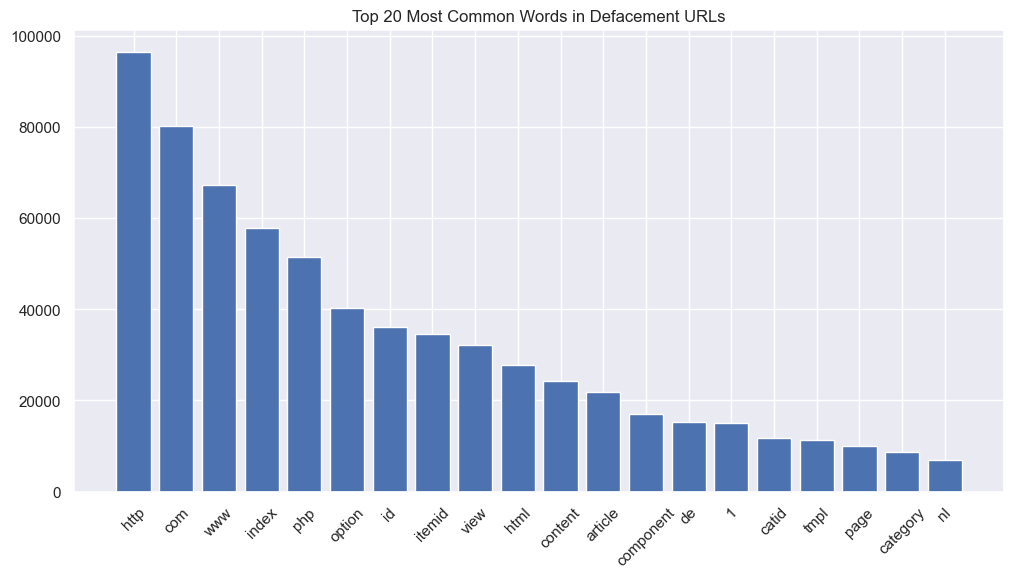

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

words = []
for url in df_deface.url:
    words.extend(re.findall(r"[a-zA-Z0-9]+", url.lower()))

counter = Counter(words).most_common(20)

labels, counts = zip(*counter)

plt.figure(figsize=(12,6))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Defacement URLs")
plt.show()


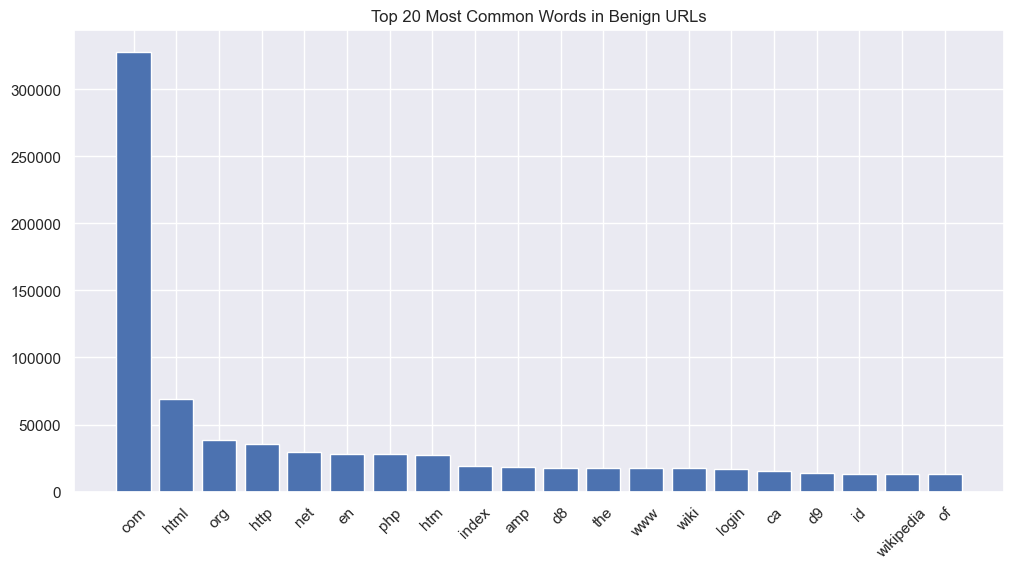

In [11]:
from collections import Counter
import matplotlib.pyplot as plt

# Split URLs into words (simple split on non-alphanumerics)
words = []
for url in df_benign.url:
    words.extend(re.findall(r"[a-zA-Z0-9]+", url.lower()))

counter = Counter(words).most_common(20)

labels, counts = zip(*counter)

plt.figure(figsize=(12,6))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Benign URLs")
plt.show()

In [51]:
import re
def having_ip_address(url):
    ip_pattern =re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5]))\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])|'
    '((0x[0-9a-fA-F]{1,2}\\.0x[0-9a-fA-F]{1,2})\\.0x[0-9a-fA-F]{1,2}\\.0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})',url)
    if ip_pattern:
        return 1 
    else:
        return 0
df['ip_exist'] =df['url'].apply(lambda i:having_ip_address(i))

In [52]:
from urllib.parse import urlparse
def abnormal_url(url):
        hostname = urlparse(url).hostname
        hostname = str(hostname)
        match = re.search(hostname, url)
        if match:
            return 1
        else:
            return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [53]:
from googlesearch import search

In [54]:
def google_index(url):
    site=search(url,5)
    return 1 if site else 0
df['google_index']=df['url'].apply(lambda i:google_index(i))

In [55]:
def count_dots(url):
    return url.count('.')
df['dot_count'] = df['url'].apply(lambda i: count_dots(i))

In [56]:
def count_www(url):
    return url.count('www')
df['www_count'] = df['url'].apply(lambda i: count_www(i))

def count_at(url):
    return url.count('@')
df['@_count'] = df['url'].apply(lambda i: count_at(i))

def count_hyphen(url):
    return url.count('-')
df['hyphen_count'] = df['url'].apply(lambda i: count_hyphen(i))

def no_of_subdomains(url):
    return url.count('/')
df['subdomain_count'] = df['url'].apply(lambda i: no_of_subdomains(i))

def shortening_service(url):
    shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|doiop\.com|shortie\.de|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t2mio\.com|lnkd\.in|db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|curtly\.cc|tinyurl\.com|owly\.com|bitlyisgud\.com"
    match = re.search(shortening_services, url)
    if match:
        return 1  # URL uses a shortening service
    else:
        return 0  # URL does not use a shortening service
df['shortening_service'] = df['url'].apply(lambda i: shortening_service(i))

In [57]:
def count_https(url):
    return url.count('https')
df['https_count'] = df['url'].apply(lambda i: count_https(i))
def count_http(url):
    return url.count('http')
df['http_count'] = df['url'].apply(lambda i: count_http(i))


In [58]:
def count_percent(url):
    return url.count('%')
df['percent_count'] = df['url'].apply(lambda i: count_percent(i))

def count_query(url):
    return url.count('?')
df['query_count'] = df['url'].apply(lambda i: count_query(i))

def count_equal(url):
    return url.count('=')
df['equal_count'] = df['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(url)
df['url_length'] = df['url'].apply(lambda i: url_length(i))

def hostname_length(url):
    return len(urlparse(url).netloc)
df['hostname_length'] =df['url'].apply(lambda i: hostname_length(i))

def no_embed(url):
    url=urlparse(url).path
    return url.count('//')
df['no_embed'] = df['url'].apply(lambda i: no_embed(i))

def suspicious_words(url):
    suspicious_keywords = r"(confirm|account|secure|webscr|login|ebayisapi|signin|banking|update|free|lucky|bonus|click|verify|password|limited|urgent|security|alert|immediate|important|request|validate)"
    
    match = re.search(suspicious_keywords, url.lower())
    return 1 if match else 0
df['suspicious_words'] = df['url'].apply(lambda i: suspicious_words(i))

def digit_count(url):
    return sum(c.isdigit() for c in url)
df['digit_count'] = df['url'].apply(lambda i: digit_count(i))

def letters_count(url):
    return sum(c.isalpha() for c in url)
df['letters_count'] = df['url'].apply(lambda i: letters_count(i))


In [59]:
df.head()

,url,type,ip_exist,abnormal_url,www_count,@_count,hyphen_count,subdomain_count,shortening_service,https_count,...,hostname_length,no_embed,suspicious_words,digit_count,letters_count,fd_length,tld_length,type_code,google_index,dot_count
0,br-icloud.com.br,phishing,0,0,0,0,1,0,0,0,...,0,0,0,0,13,0,-1,3,1,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,0,0,2,0,0,...,0,0,0,1,29,5,-1,0,1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,0,0,3,0,0,...,0,0,0,1,25,7,-1,0,1,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,0,1,3,0,0,...,21,0,0,7,63,9,2,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,0,1,3,0,0,...,23,0,0,22,199,9,3,1,1,2


In [23]:
from tld import get_tld
from urllib.parse import urlparse
import os.path
def fd_length(url):
    urlpath = urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except :
        return 0
df['fd_length'] = df['url'].apply(lambda i: fd_length(i))
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))


In [24]:
df=df.drop(['tld'], axis=1)

In [26]:
df.columns

Index(['url', 'type', 'ip_exist', 'abnormal_url', 'www_count', '@_count',
       'hyphen_count', 'subdomain_count', 'shortening_service', 'https_count',
       'http_count', 'percent_count', 'query_count', 'equal_count',
       'url_length', 'hostname_length', 'no_embed', 'suspicious_words',
       'digit_count', 'letters_count', 'fd_length', 'tld_length'],
      dtype='object')

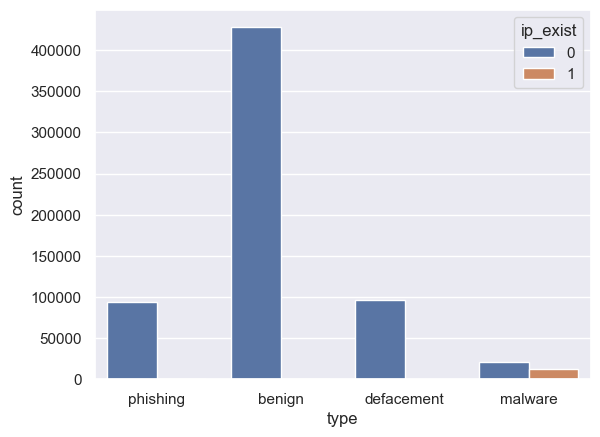

In [31]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='ip_exist')

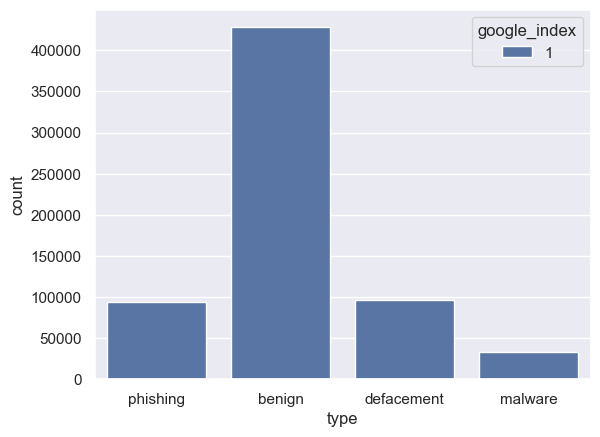

In [32]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='google_index')

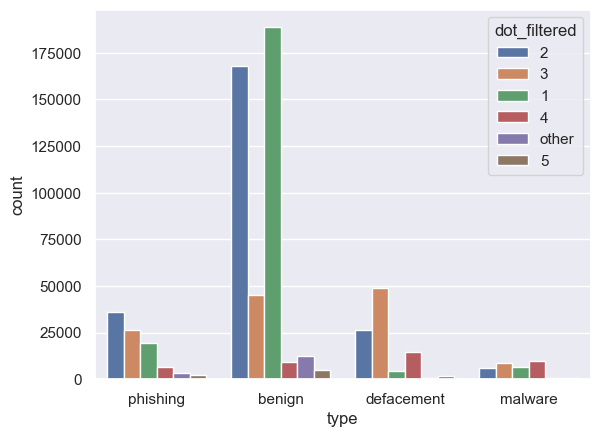

In [33]:
top = df['dot_count'].value_counts().index[:5]  # keep top 5
df['dot_filtered'] = df['dot_count'].apply(lambda x: x if x in top else "other")

sns.countplot(x='type', data=df, hue='dot_filtered')
plt.show()


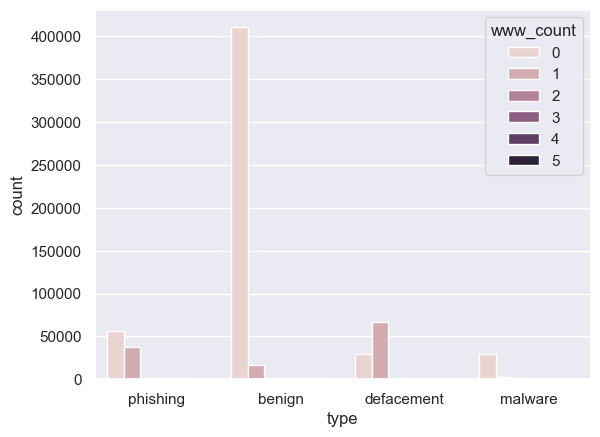

In [34]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='www_count')

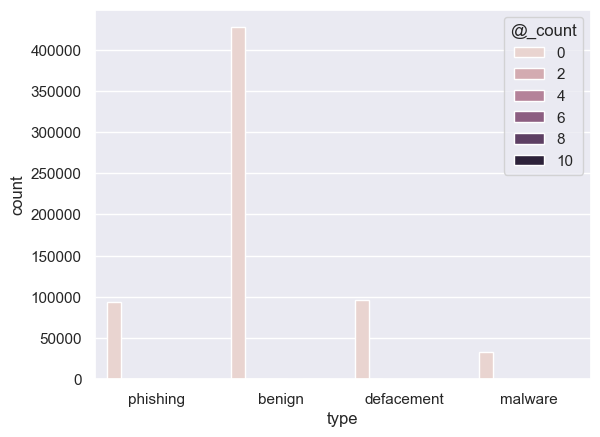

In [35]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='@_count')

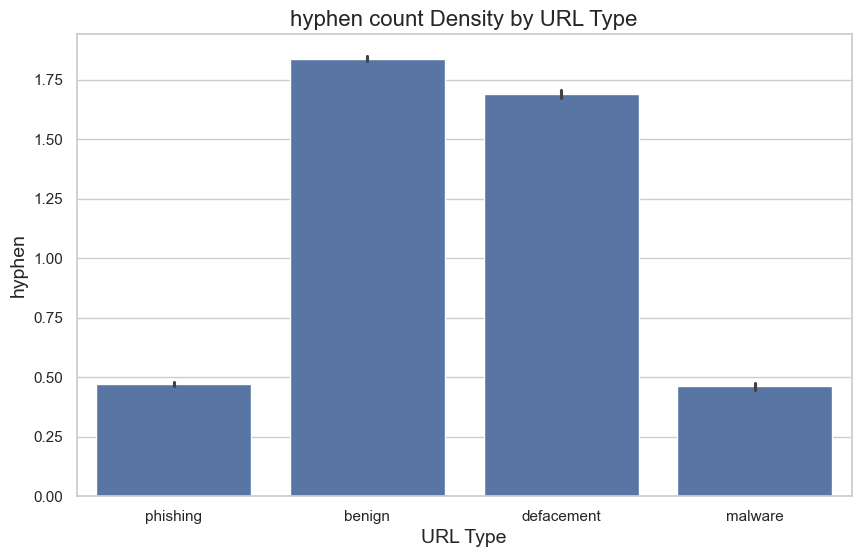

In [47]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

sns.barplot(x='type', y='hyphen_count', data=df)

plt.title("hyphen count Density by URL Type", fontsize=16)
plt.xlabel("URL Type", fontsize=14)
plt.ylabel("hyphen", fontsize=14)
plt.show()

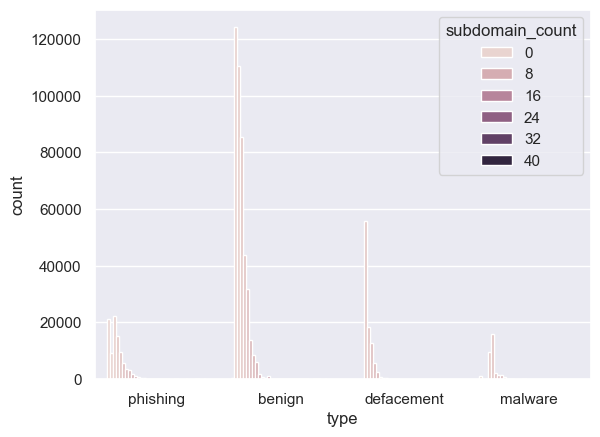

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='subdomain_count')

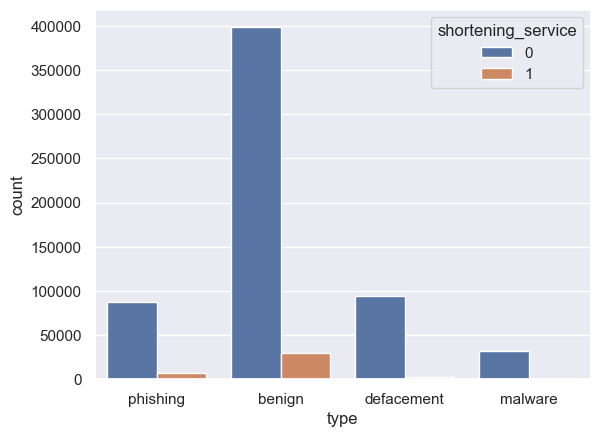

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='shortening_service')

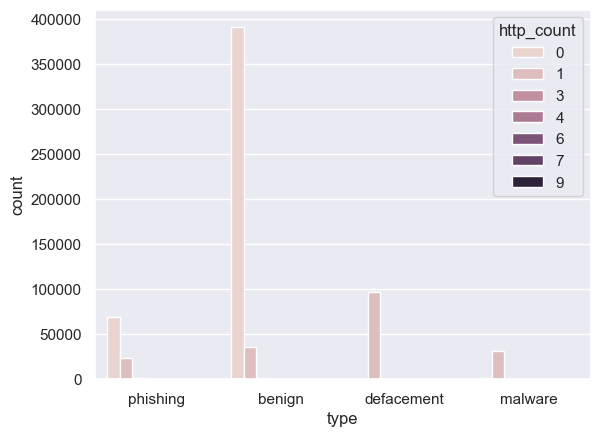

In [20]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='http_count')

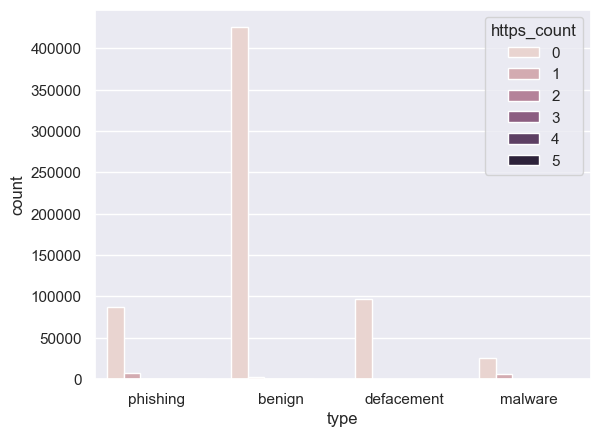

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='https_count')

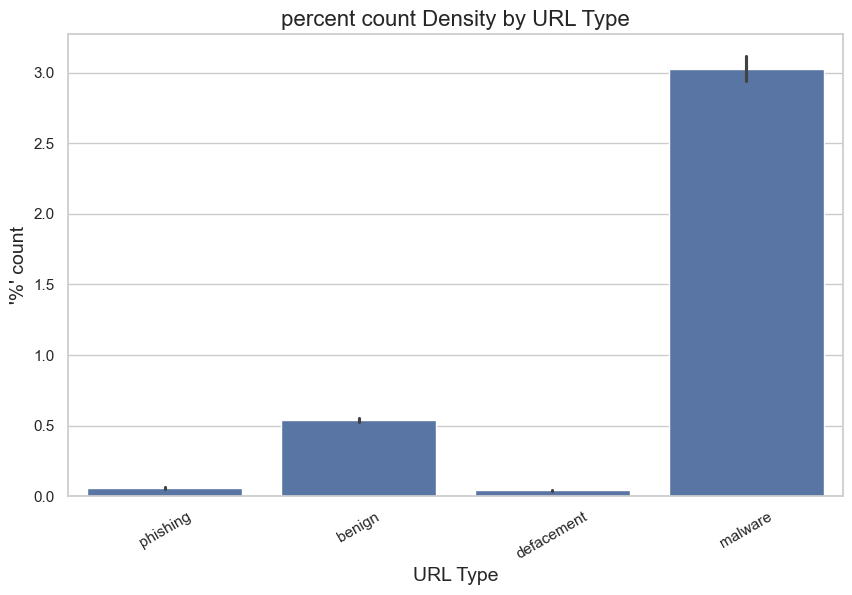

In [42]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

sns.barplot(x='type', y='percent_count', data=df)

plt.title("percent count Density by URL Type", fontsize=16)
plt.xlabel("URL Type", fontsize=14)
plt.ylabel("'%' count", fontsize=14)
plt.xticks(rotation=30)
plt.show()

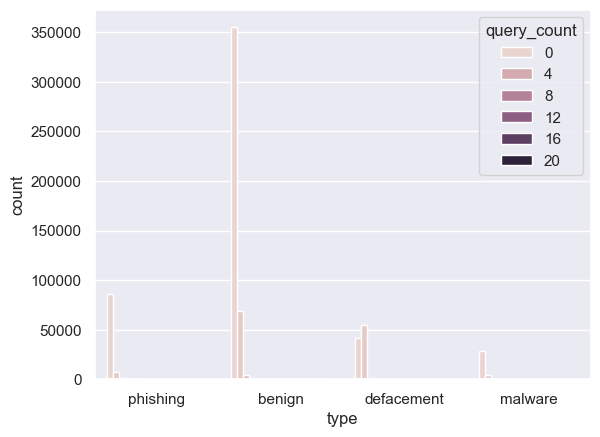

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='query_count')

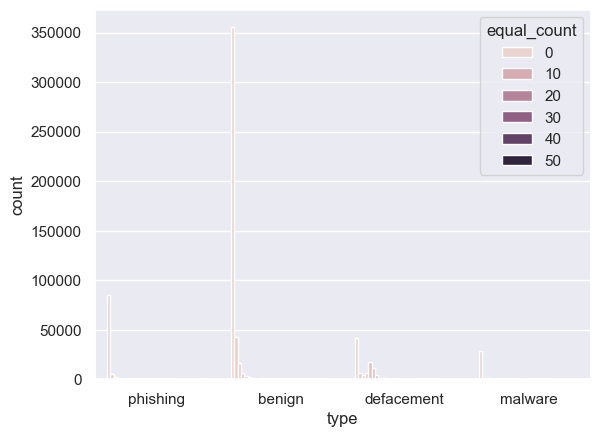

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='equal_count')

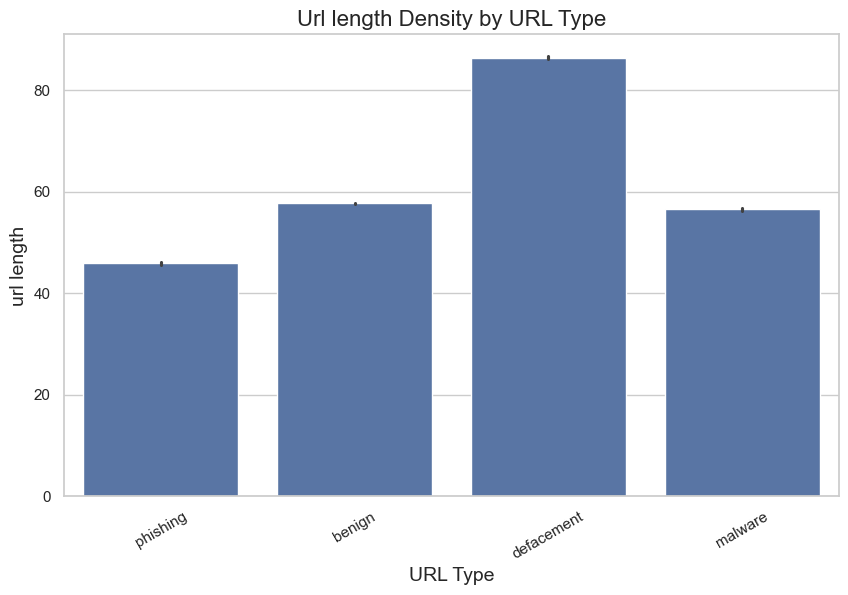

In [40]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

sns.barplot(x='type', y='url_length', data=df)

plt.title("Url length Density by URL Type", fontsize=16)
plt.xlabel("URL Type", fontsize=14)
plt.ylabel("url length", fontsize=14)
plt.xticks(rotation=30)
plt.show()

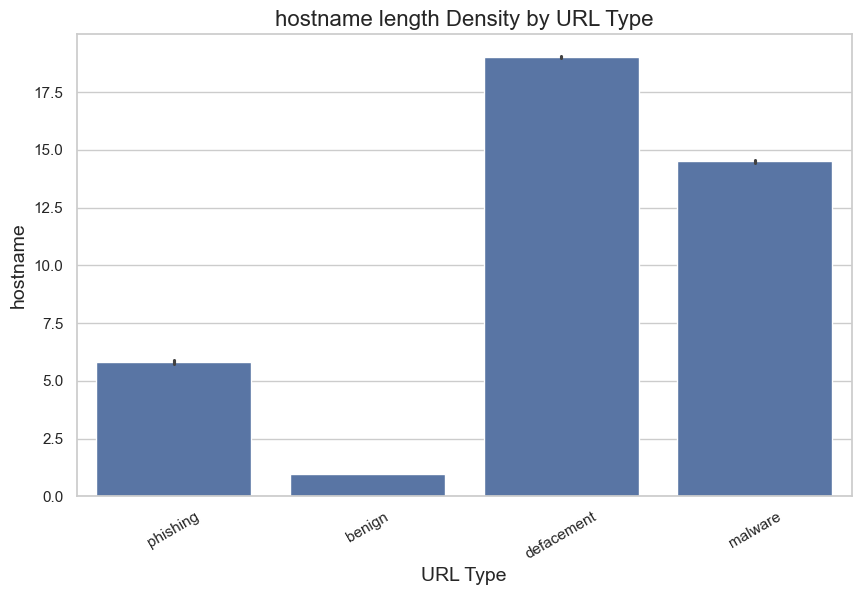

In [39]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

sns.barplot(x='type', y='hostname_length', data=df)

plt.title("hostname length Density by URL Type", fontsize=16)
plt.xlabel("URL Type", fontsize=14)
plt.ylabel("hostname", fontsize=14)
plt.xticks(rotation=30)
plt.show()

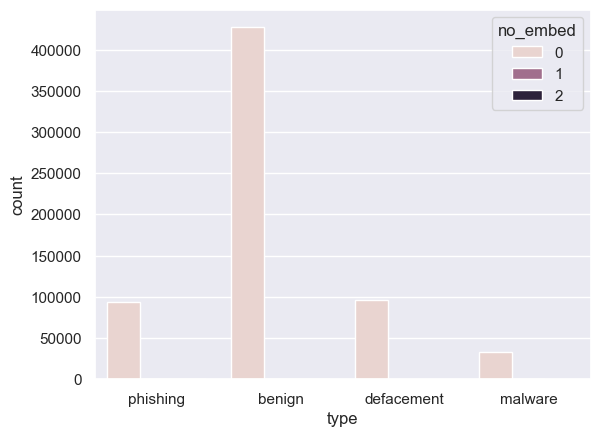

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='no_embed')

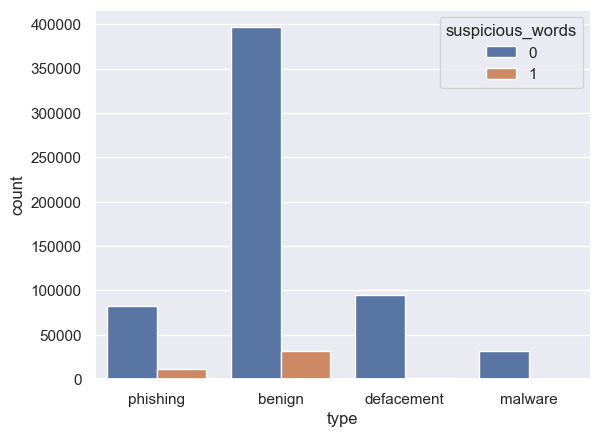

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='suspicious_words')

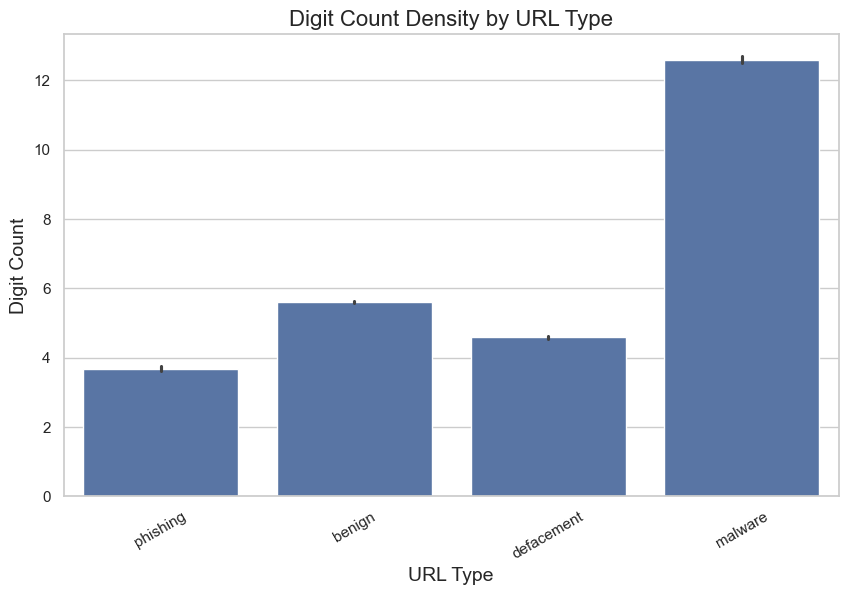

In [37]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

sns.barplot(x='type', y='digit_count', data=df)

plt.title("Digit Count Density by URL Type", fontsize=16)
plt.xlabel("URL Type", fontsize=14)
plt.ylabel("Digit Count", fontsize=14)
plt.xticks(rotation=30)
plt.show()

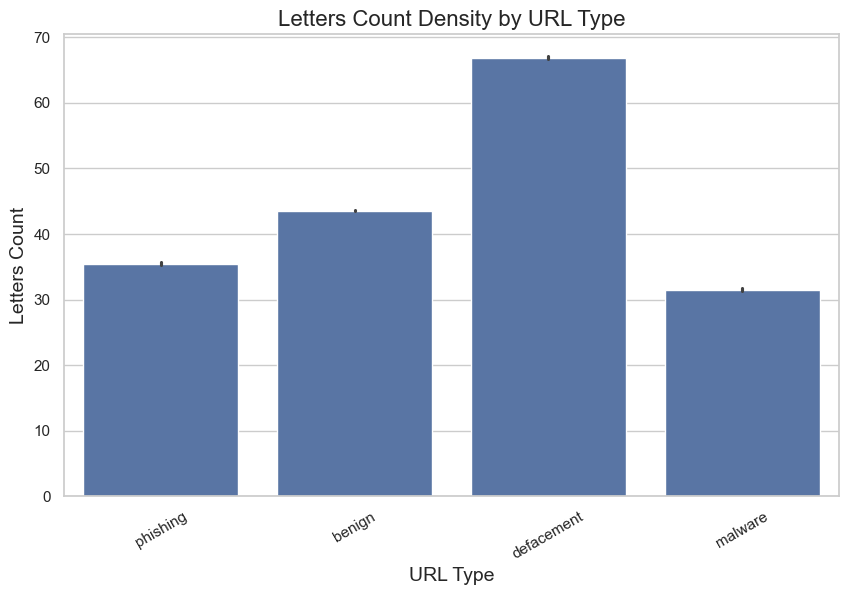

In [36]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

sns.barplot(x='type', y='letters_count', data=df)

plt.title("Letters Count Density by URL Type", fontsize=16)
plt.xlabel("URL Type", fontsize=14)
plt.ylabel("Letters Count", fontsize=14)
plt.xticks(rotation=30)
plt.show()

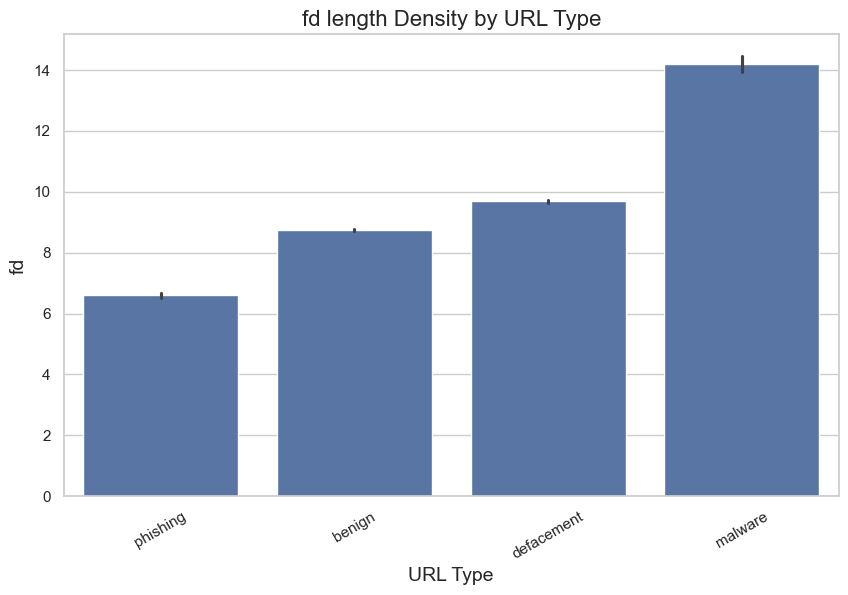

In [48]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

sns.barplot(x='type', y='fd_length', data=df)

plt.title("fd length Density by URL Type", fontsize=16)
plt.xlabel("URL Type", fontsize=14)
plt.ylabel("fd", fontsize=14)
plt.xticks(rotation=30)
plt.show()

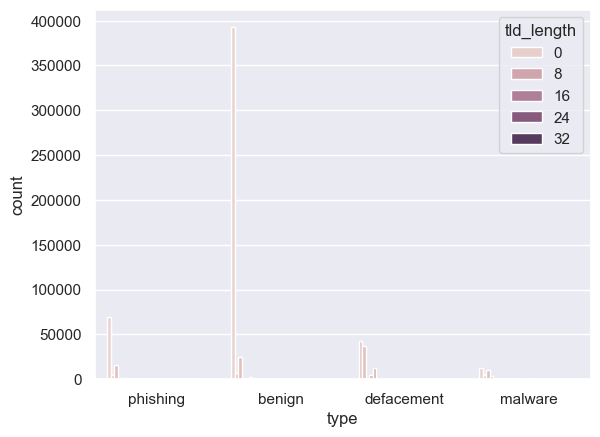

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
anex = sns.countplot(x='type', data=df,hue='tld_length')

In [49]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['type_code']=lb.fit_transform(df['type'])
df['type_code'].value_counts()

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [60]:
x= df[
    [
    'ip_exist', 'abnormal_url', 'dot_count', 'www_count', '@_count', 'hyphen_count',
    'subdomain_count', 'shortening_service', 'https_count', 'http_count', 'percent_count',
    'query_count', 'equal_count', 'url_length', 'hostname_length', 'no_embed', 'suspicious_words',
    'digit_count', 'letters_count', 'fd_length', 'tld_length']
]
y = df['type_code']


In [ ]:
x.head()

,ip_exist,abnormal_url,dot_count,www_count,@_count,hyphen_count,subdomain_count,shortening_service,https_count,http_count,...,query_count,equal_count,url_length,hostname_length,no_embed,suspicious_words,digit_count,letters_count,fd_length,tld_length
0,0,0,2,0,0,1,0,0,0,0,...,0,0,16,0,0,0,0,13,0,-1
1,0,0,2,0,0,0,2,0,0,0,...,0,0,35,0,0,0,1,29,5,-1
2,0,0,2,0,0,0,3,0,0,0,...,0,0,31,0,0,0,1,25,7,-1
3,0,1,3,1,0,1,3,0,0,1,...,1,4,88,21,0,0,7,63,9,2
4,0,1,2,0,0,1,3,0,0,1,...,1,3,235,23,0,0,22,199,9,3


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5,stratify=y)

In [ ]:
#lgboost classifier
lgb=LGBMClassifier(objective='multiclass', boosting_type='gbdt', n_jobs=5,random_state=5)
lgb_c=lgb.fit(x_train, y_train)
y_pred_lgb=lgb_c.predict(x_test)
print(classification_report(
    y_test,
    y_pred_lgb,
    target_names=['benign', 'defacement', 'malware', 'phishing']
))
score=accuracy_score(y_test, y_pred_lgb)
f1=f1_score(y_test, y_pred_lgb)
print("F1 Score: %0.3f " % f1)
print("Accuracy: %0.3f " % score)

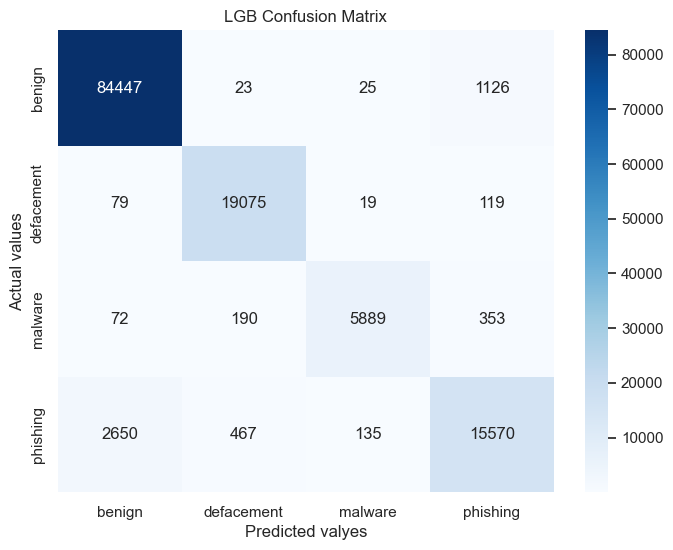

In [ ]:
cm=confusion_matrix(y_test, y_pred_lgb)
cm_df = pd.DataFrame(cm, index=['benign', 'defacement', 'malware', 'phishing'], columns=['benign', 'defacement', 'malware', 'phishing'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('LGB Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted valyes')
plt.show()

<Axes: >

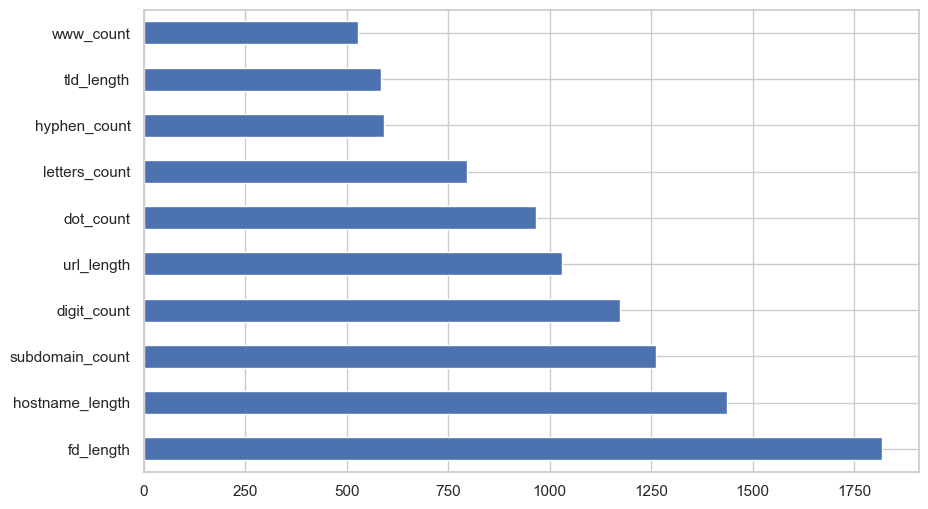

In [65]:
feat_importances = pd.Series(lgb.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,6))

In [69]:
def main_predictor(url):
    features = []
    features.append(having_ip_address(url))
    features.append(abnormal_url(url))
    features.append(count_dots(url))
    features.append(count_www(url))
    features.append(count_at(url))
    features.append(count_hyphen(url))
    features.append(no_of_subdomains(url))
    features.append(shortening_service(url))
    features.append(count_https(url))
    features.append(count_http(url))
    features.append(count_percent(url))
    features.append(count_query(url))
    features.append(count_equal(url))
    features.append(url_length(url))
    features.append(hostname_length(url))
    features.append(no_embed(url))
    features.append(suspicious_words(url))
    features.append(digit_count(url))
    features.append(letters_count(url))
    features.append(fd_length(url))
    features.append(tld_length(get_tld(url, fail_silently=True)))
    
    return features

In [87]:
def get_prediction(test_url):
    features_test = main_predictor(test_url)
    features_test = np.array(features_test).reshape(1, -1)

    pred = lgb.predict(features_test)
    if int(pred[0]) == 0:
        res = 'phishing'
    elif int(pred[0]) == 1:
        res = 'defacement'
    elif int(pred[0]) == 2:
        res = 'malware'
    elif int(pred[0]) == 3:
        res = 'safe'
    return res


In [88]:
# Test the predictor
urls = [
    'facebook.com',
    'titanicthemes.com/free-facebook-giveaway/',
]

for url in urls:
    print(url, "→", get_prediction(url))


facebook.com → safe
titanicthemes.com/free-facebook-giveaway/ → phishing


c:\Users\molka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\molka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [92]:
import joblib
joblib.dump(lgb, 'lgb_model.pkl')

['lgb_model.pkl']